In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#input data
year_2015 = pd.read_csv("/content/drive/MyDrive/World Happiness Data/2015.csv")
year_2016 = pd.read_csv("/content/drive/MyDrive/World Happiness Data/2016.csv")
year_2017 = pd.read_csv("/content/drive/MyDrive/World Happiness Data/2017.csv")
year_2018 = pd.read_csv("/content/drive/MyDrive/World Happiness Data/2018.csv")
year_2019 = pd.read_csv("/content/drive/MyDrive/World Happiness Data/2019.csv")

#Cleaning data

year_2015 = year_2015.drop('Standard Error',axis = 1)

year_2016 = year_2016.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis = 1)

year_2017 = year_2017.drop(['Whisker.high','Whisker.low'],axis = 1)

year_2015 = year_2015.rename(columns =
                  {'Family': 'Social support'})

year_2016 = year_2016.rename(columns =
                  {'Family': 'Social support'})

year_2017 = year_2017.rename(columns =
                  {'Happiness.Rank': 'Happiness Rank',
                   'Happiness.Score': 'Happiness Score',
                   'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                   'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                   'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                   'Dystopia.Residual': 'Dystopia Residual',
                   'Family': 'Social support'})

year_2018 = year_2018.rename(columns=
                {'Country or region': 'Country',
                 'Overall rank': 'Happiness Rank',
                 'Score': 'Happiness Score',
                 'GDP per capita':'Economy (GDP per Capita)',
                 'Healthy life expectancy': 'Health (Life Expectancy)',
                 'Freedom to make life choices': 'Freedom',
                 'Perceptions of corruption': 'Trust (Government Corruption)'})

year_2019 = year_2019.rename(columns=
                {'Country or region': 'Country',
                 'Overall rank': 'Happiness Rank',
                 'Score': 'Happiness Score',
                 'GDP per capita':'Economy (GDP per Capita)',
                 'Healthy life expectancy': 'Health (Life Expectancy)',
                 'Freedom to make life choices': 'Freedom',
                 'Perceptions of corruption': 'Trust (Government Corruption)'})
#Adding Region columns to 2017,2018,2019
def check_country(region):
    matching_region = year_2015.loc[year_2015['Country'] == region['Country']]
    if not matching_region.empty:
        return matching_region['Region'].values[0]
    #else:
        #return "NaN"

year_2017['Region'] = year_2017.apply(check_country, axis=1)
year_2018['Region'] = year_2018.apply(check_country, axis=1)
year_2019['Region'] = year_2019.apply(check_country, axis=1)

#Set column year
year_2015['Year'] = 2015
year_2016['Year'] = 2016
year_2017['Year'] = 2017
year_2018['Year'] = 2018
year_2019['Year'] = 2019

#collapse data
happiness_data = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])

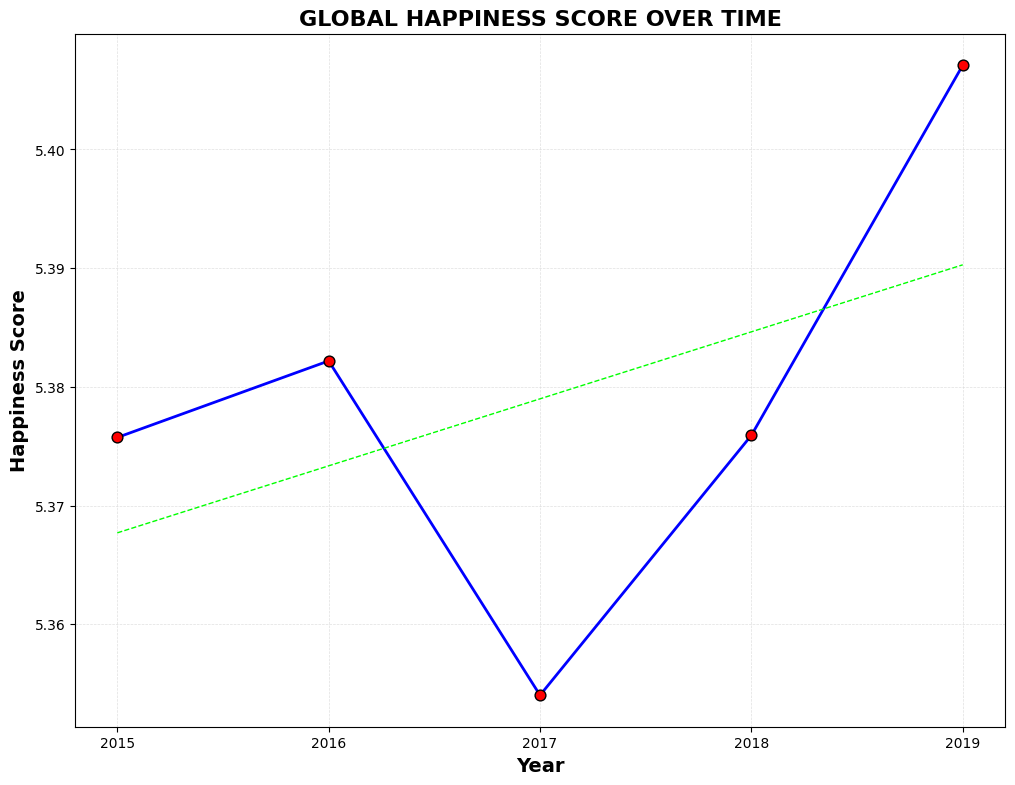

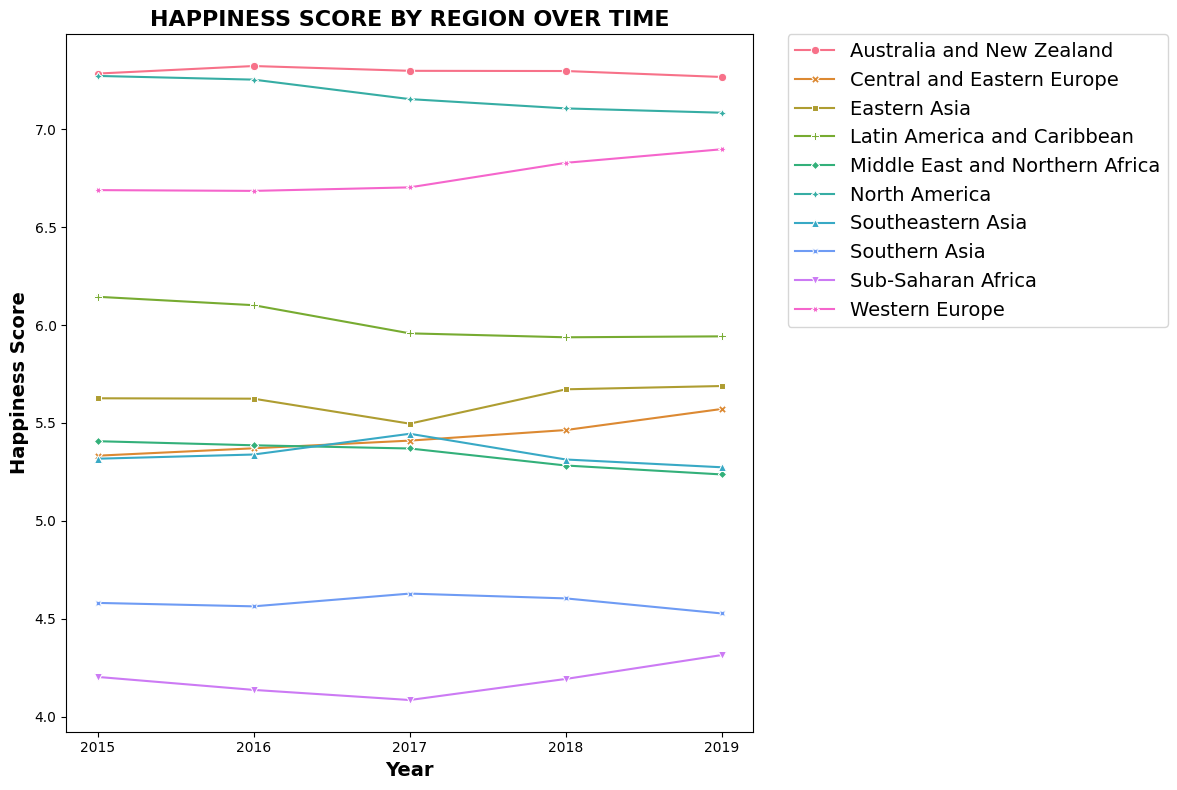

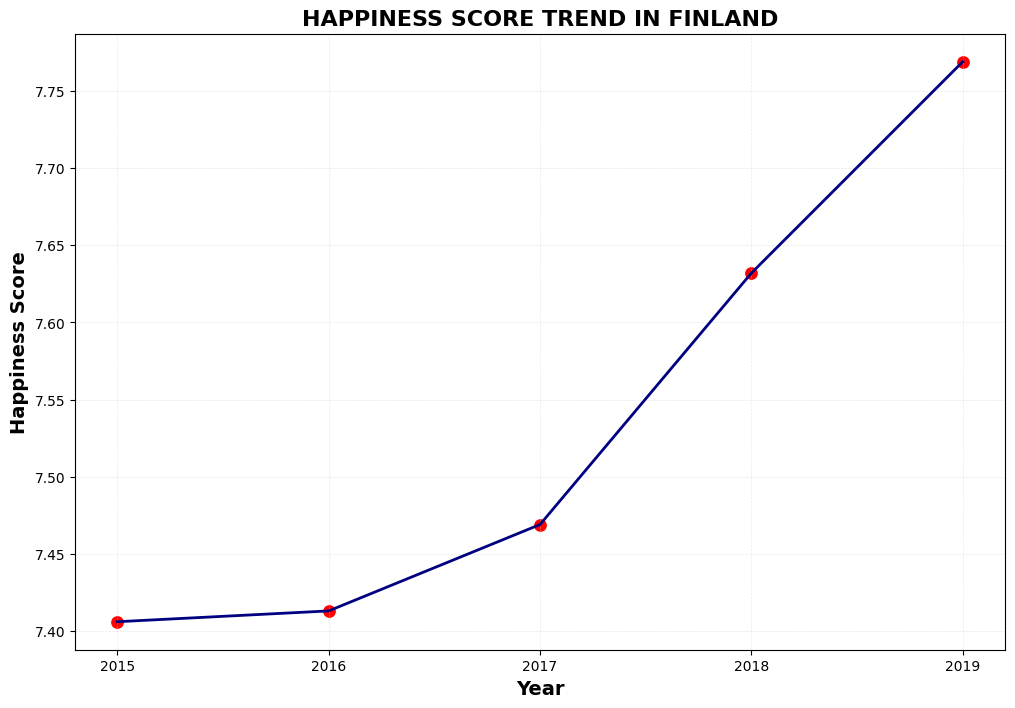

In [2]:
#QUESTION 1: How has happiness evolved over time globally, regionally, and within specific countries?.
#Plot 1
plt.figure(figsize=(12, 9))
plt.style.use('default')

global_happiness = happiness_data.groupby('Year')['Happiness Score'].mean().reset_index()
sns.lineplot(x='Year', y='Happiness Score', data=global_happiness, color='blue', linewidth=2)

plt.scatter(global_happiness['Year'], global_happiness['Happiness Score'], color='red', s=60, edgecolors='black', zorder=3)

# Adding a trendline
coefficients = np.polyfit(global_happiness['Year'], global_happiness['Happiness Score'], 1)
trendline = np.poly1d(coefficients)
plt.plot(global_happiness['Year'], trendline(global_happiness['Year']), color='lime', linestyle='--', linewidth=1)

plt.xticks(global_happiness['Year'])
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title('GLOBAL HAPPINESS SCORE OVER TIME', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=14, fontweight='bold')

plt.show()

#Plot 2
#Analyze happiness trends by region over time.
region_happiness = happiness_data.groupby(['Region','Year'])['Happiness Score'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.style.use('default')
colors = sns.color_palette("husl", n_colors=len(region_happiness['Region'].unique()))

sns.lineplot(x='Year', y='Happiness Score', hue='Region', style='Region', markers=True,
             dashes=False, data=region_happiness, palette=colors)

plt.title('HAPPINESS SCORE BY REGION OVER TIME', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=14, fontweight='bold')

plt.xticks(region_happiness['Year'].unique())

# Fine-tune the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.tight_layout()

plt.show()

#Plot 3
#Analyze happiness trends within specific countries.
plt.figure(figsize=(12, 8))
plt.style.use('default')

country = 'Finland'  # Specify the country you want to analyze
country_data = happiness_data[happiness_data['Country'] == country]

sns.lineplot(x='Year', y='Happiness Score', data=country_data, color='navy', linewidth=2)

sns.scatterplot(x='Year', y='Happiness Score', data=country_data, color='red', s=100)

plt.title(f'HAPPINESS SCORE TREND IN {country.upper()}', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=14, fontweight='bold')

plt.xticks(country_data['Year'])
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

Question 1:
1. Biểu đồ xu hướng hạnh phúc toàn cầu theo thời gian:

- Biểu đồ này cho thấy trung bình sự thay đổi của hạnh phúc trên toàn cầu theo từng năm. Cụ thể là từ năm 2015 đến năm 2019.
- Chúng ta có thể nhận thấy xu hướng chung về hạnh phúc tăng từ năm 2015 đến năm 2016 và có xu hướng giảm nhẹ vào giữa năm 2016 đến 2017 và tăng liên tục cho đến năm 2019.
- Nếu điểm hạnh phúc trung bình tăng theo thời gian, điều này có thể cho thấy sự cải thiện về chất lượng cuộc sống và hạnh phúc của con người.

2. Biểu đồ xu hướng hạnh phúc theo vùng qua thời gian:

- Biểu đồ này giúp chúng ta so sánh xu hướng hạnh phúc giữa các vùng/châu lục khác nhau trong mỗi năm.
- Sự so sánh này cho phép chúng ta thấy các vùng có điểm hạnh phúc cao hơn hoặc thấp hơn so với nhau, cũng như xu hướng của từng vùng theo thời gian. Ta có thể nhìn thấy rõ ở các vùng Aus & Newzealand, North America, Western Europe dẫn đầu trong thang điểm hạnh phúc. Ở phần giữa gồm các vùng như Latin America & Caribean... Middle East and Nothern Afica. Và ở thang cuối gồm Southern Asia và Sub Sahara.
-- Kêts luận lại theo thời gian sau 5 năm không thay đổi nhiều

3. Biểu đồ xu hướng hạnh phúc trong các quốc gia cụ thể:

Biểu đồ này tập trung vào một quốc gia cụ thể (trong ví dụ này là 'Finland') và thể hiện xu hướng hạnh phúc của quốc gia đó theo thời gian. Ở đây ta có thể thấy mức độ hạnh phúc ở Thuỵ sỹ có xu hướng giảm nhẹ theo thời gian.

<ipython-input-3-4a1a254fb73d>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

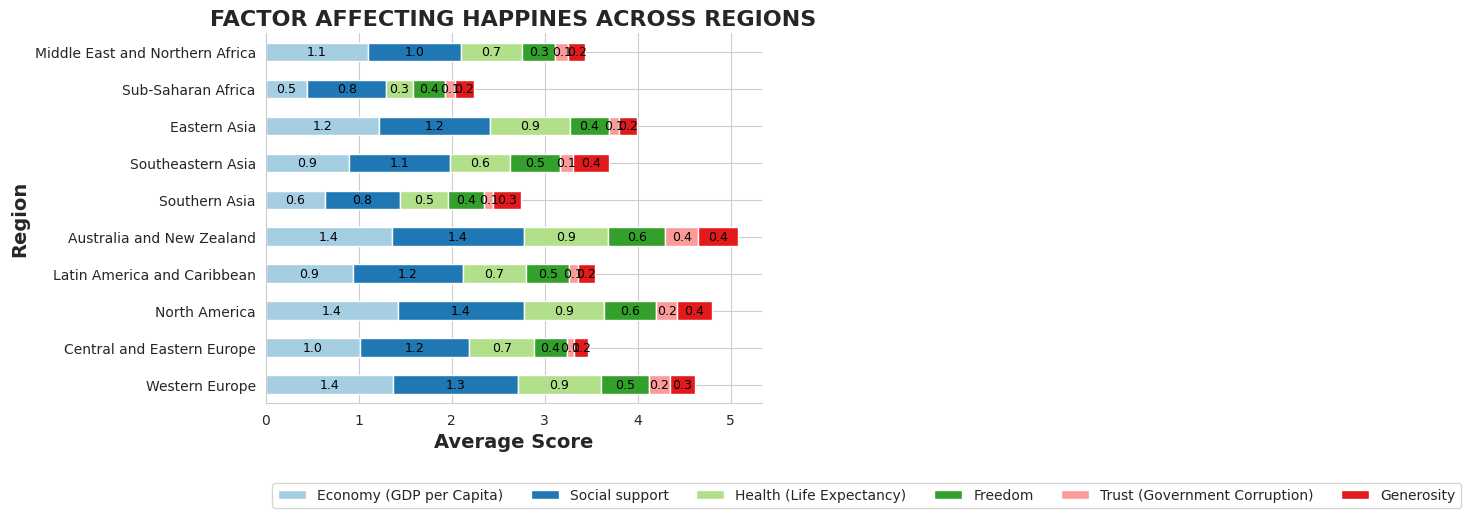

In [3]:
#QUESTION 2(Version 1): Are there any trends in happiness scores across continents or within specific regions?
variables = ['Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity']

# Concatenate the data frames into one
df = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])

# Group the data by region and calculate the mean
df1 = df.groupby('Region')[variables].mean()

# Reindex the data in a specific order
order = ['Middle East and Northern Africa', 'Sub-Saharan Africa', 'Eastern Asia', 'Southeastern Asia',
         'Southern Asia', 'Australia and New Zealand', 'Latin America and Caribbean', 'North America',
         'Central and Eastern Europe', 'Western Europe']
df1 = df1.reindex(order)

# Set plot style
sns.set_style("whitegrid")
sns.set_palette("Paired")

# Plot the data
plt.figure(figsize=(12, 8))
ax = df1.plot(kind='barh', stacked=True)

# Customize the plot
plt.xlabel('Average Score', fontsize=14, fontweight='bold')
plt.ylabel('Region', fontsize=14, fontweight='bold')
plt.title('FACTOR AFFECTING HAPPINES ACROSS REGIONS', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(0, -0.25), loc='center left', ncol=len(variables), fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add data value annotations inside each stacked bar
for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x() + width / 2
    y = patch.get_y() + height / 2
    value = round(width, 1)
    ax.text(x, y, str(value), ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Tổng quan, có sự biến đổi về điểm hạnh phúc trên các lục địa khác nhau.

1. Châu Phi (Africa):
Điểm hạnh phúc trung bình của Châu Phi trong các năm 2015, 2016 và 2017 không thay đổi đáng kể.
Tuy nhiên, năm 2018, điểm hạnh phúc trung bình của Châu Phi giảm so với các năm trước, cho thấy có xu hướng giảm sự hạnh phúc.

2. Châu Á (Asia):
Châu Á có một xu hướng tăng dần về điểm hạnh phúc trung bình từ năm 2015 đến năm 2018.
Điểm hạnh phúc trung bình của Châu Á tăng đáng kể trong khoảng thời gian này, cho thấy sự tiến bộ và cải thiện về hạnh phúc trên lục địa này.

3. Châu Đại Dương (Áustralia):
Châu Đại Dương có điểm hạnh phúc trung bình cao nhất so với các lục địa khác trong cả bốn năm và vẫn duy trì vị trí hàng đầu về mức độ hạnh phúc trung bình.

4. Châu Mỹ (North America, Central America, South America):
Châu Mỹ có điểm hạnh phúc trung bình ổn định trong suốt các năm.
Điểm hạnh phúc trung bình của Châu Mỹ được duy trì ở mức cao và không có xu hướng tăng hay giảm đáng kể.

5. Châu Âu (Europe):
Giống Châu Mỹ, Châu Âu cũng có điểm hạnh phúc trung bình ổn định trong suốt các năm .
Mức độ hạnh phúc trên lục địa này không có sự biến đổi lớn trong khoảng thời gian 2015-2018.

AttributeError: Text.set() got an unexpected keyword argument 'pad'

<Figure size 1200x800 with 0 Axes>

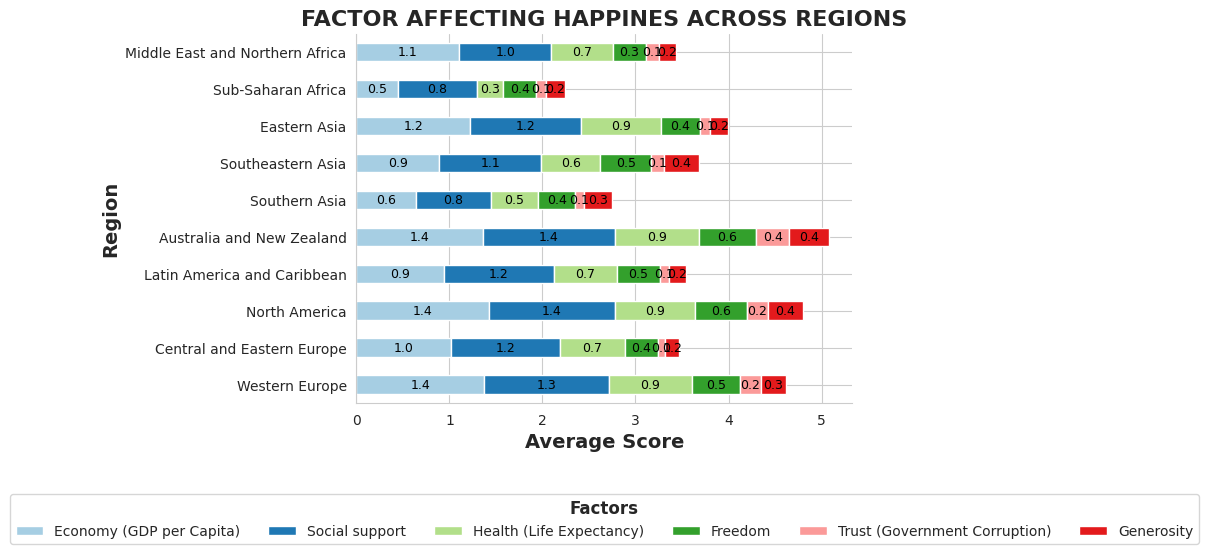

In [4]:
#QUESTION 2 (Version 2): Are there any trends in happiness scores across continents or within specific regions?
variables = ['Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity']

# Concatenate the data frames into one
df = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])

# Group the data by region and calculate the mean
df1 = df.groupby('Region')[variables].mean()

# Reindex the data in a specific order
order = ['Middle East and Northern Africa', 'Sub-Saharan Africa', 'Eastern Asia', 'Southeastern Asia',
         'Southern Asia', 'Australia and New Zealand', 'Latin America and Caribbean', 'North America',
         'Central and Eastern Europe', 'Western Europe']
df1 = df1.reindex(order)

# Set plot style
sns.set_style("whitegrid")
sns.set_palette("Paired")

# Plot the data
plt.figure(figsize=(12, 8))
ax = df1.plot(kind='barh', stacked=True)

# Customize the plot
plt.xlabel('Average Score', fontsize=14, fontweight='bold')
plt.ylabel('Region', fontsize=14, fontweight='bold')
plt.title('FACTOR AFFECTING HAPPINES ACROSS REGIONS', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(0, -0.25), loc='center left', ncol=len(variables), fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add data value annotations inside each stacked bar
for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x() + width / 2
    y = patch.get_y() + height / 2
    value = round(width, 1)
    ax.text(x, y, str(value), ha='center', va='center', fontsize=9, color='black')

# Create a legend with a customized title and title padding
legend = plt.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', ncol=len(variables), fontsize=10,
                    title='Factors', title_fontsize=12)
legend.get_title().set_fontweight('bold')
plt.setp(legend.get_title(), pad=10)

plt.tight_layout()
plt.show()

<ipython-input-5-6089e67b0cba>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_data, x='Country', y=variable, ax=ax, palette='Paired')
<ipython-input-5-6089e67b0cba>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
<ipython-input-5-6089e67b0cba>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(label, 2) for label in ax.get_yticks()])  # Round y-axis tick labels
<ipython-input-5-6089e67b0cba>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_data, x='Country', y=variable, ax=ax, palette='Paired')
<ipytho

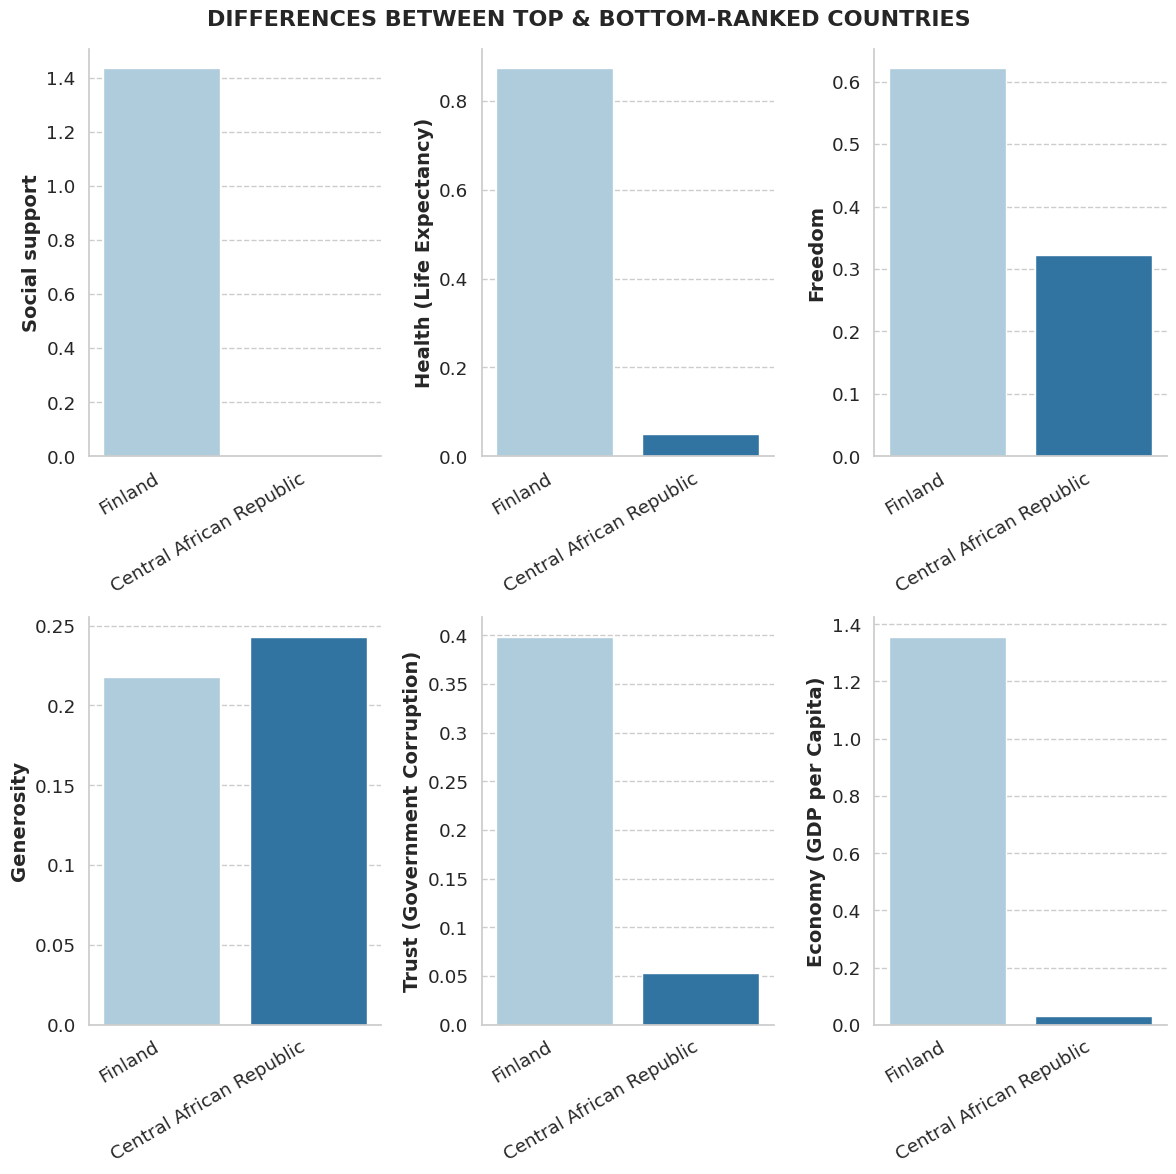

In [5]:
#QUESTION 3: What are the key differences between the top and bottom ranked countries in terms of happiness?

# Define a list of variables to plot
variables = ['Social support', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Economy (GDP per Capita)']

# Concatenate the yearly DataFrames into a single DataFrame
key_data = happiness_data.groupby(['Country','Year'])[variables].mean().reset_index()

# Filter the key_data DataFrame for Finland and Central African Republic
finland_data = key_data[key_data['Country'] == 'Finland']
central_african_data = key_data[key_data['Country'] == 'Central African Republic']

# Calculate the average values for Finland and Central African Republic
finland_avg = finland_data[variables].mean()
central_african_avg = central_african_data[variables].mean()

# Create a DataFrame combining the average values for Finland and Central African Republic
comparison_data = pd.concat([finland_avg, central_african_avg], axis=1).transpose()
comparison_data.columns = variables
comparison_data['Country'] = ['Finland', 'Central African Republic']

# Set the style
sns.set(style='whitegrid', font_scale=1.2)

# Plotting the grouped bar plot
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
fig.suptitle("DIFFERENCES BETWEEN TOP & BOTTOM-RANKED COUNTRIES", fontsize=16, fontweight='bold')

# Iterate through the variables and create subplots
for ax, variable in zip(axes.flat, variables):
    sns.barplot(data=comparison_data, x='Country', y=variable, ax=ax, palette='Paired')
    ax.set_xlabel('')
    ax.set_ylabel(variable, fontsize=14, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_yticklabels([round(label, 2) for label in ax.get_yticks()])  # Round y-axis tick labels
    ax.grid(axis='y', linestyle='--', linewidth=1, alpha=1)
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

- Đồ thị này đc tính theo trung bình của 5 năm và rút ra được 2 nước có chỉ số....

Tổng quan, nước đứng đầu trong bảng xếp hạng có xu hướng về mức độ hạnh phúc
cao hơn, tuổi thọ và sức khỏe cũng tốt hơn. Điều này cho thấy tầm quan trọng của sức khỏe và tuổi thọ đối với mức độ hạnh phúc của một quốc gia.

Nước đứng cuối sẽ có mức độ về sự tự do và rộng lượng thấp hơn so với nước đầu bảng xếp hạng. Sự tự do này có thể bao gồm về tự do cá nhân, tự do dân chủ và tự do tài chính. Sự rộng lượng có thể là việc sẵn lòng giúp đỡ người khác và chia sẻ tài nguyên sẵn có.

Tương tự với mức độ tin tưởng cao hơn vào chính phủ và việc ít tham nhũng hơn ở nước đứng đầu bảng, cũng như có kinh tế phát triển tốt hơn so với nước cuối bảng xếp hạng. Các yếu tố này đóng vai trò quan trọng trong việc tạo ra một môi trường thúc đẩy hạnh phúc và sự phát triển thịnh vượng của một quốc gia.

- thể hiện các chỉ số gấp bao nhiêu lần

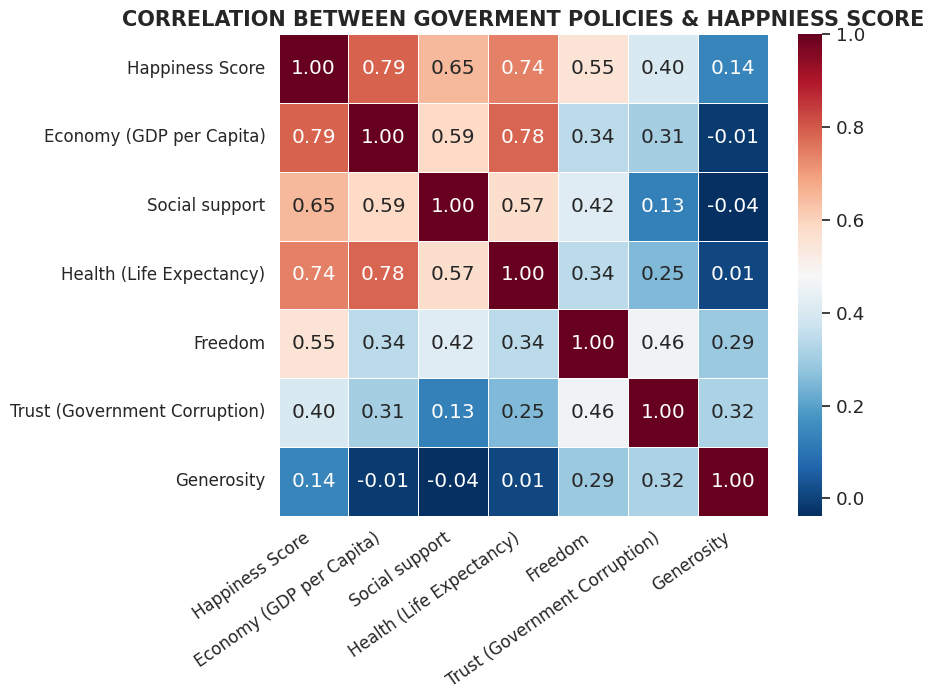

In [6]:
#QUESTION 4: Is there a correlation between government policies and happiness scores?
happiness_data = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])
variables = ['Happiness Score','Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

correlation_data = happiness_data[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.5, cbar=True)

#Customize Chart
plt.title('CORRELATION BETWEEN GOVERMENT POLICIES & HAPPNIESS SCORE', fontsize=15, fontweight='bold')
plt.xticks(rotation=35, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=3)

plt.show()

Biểu đồ heatmap cho chúng ta cái nhìn về mối quan hệ tương quan giữa các chính sách chính phủ và điểm hạnh phúc. Mỗi ô trong biểu đồ được điền màu và giá trị số, thể hiện mức độ tương quan giữa các cặp biến.

Giá trị của hệ số tương quan nằm trong khoảng từ -1 đến 1. Một giá trị gần -1 cho thấy một mối quan hệ âm mạnh giữa hai biến; một giá trị gần 1 cho thấy một mối quan hệ dương mạnh; và một giá trị gần 0 cho thấy không có mối quan hệ tuyến tính giữa hai biến.

Các ô được màu sắc để thể hiện mức độ tương quan. Màu sắc từng ô có thể biểu thị mức độ tương quan dương hoặc âm. Màu sáng biểu thị mức độ tương quan cao, trong khi màu tối biểu thị mức độ tương quan thấp.

Biểu đồ heatmap giúp chúng ta nhìn thấy mối quan hệ giữa các chính sách chính phủ và điểm hạnh phúc. Những ô có màu sáng hoặc tối đại đại diện cho mức độ tương quan cao, cho thấy rằng có mối quan hệ mạnh giữa chính sách và điểm hạnh phúc. Biểu đồ này có thể giúp chúng ta hiểu rõ hơn về những chính sách nào có tương quan tích cực hoặc tiêu cực với hạnh phúc của một quốc gia.

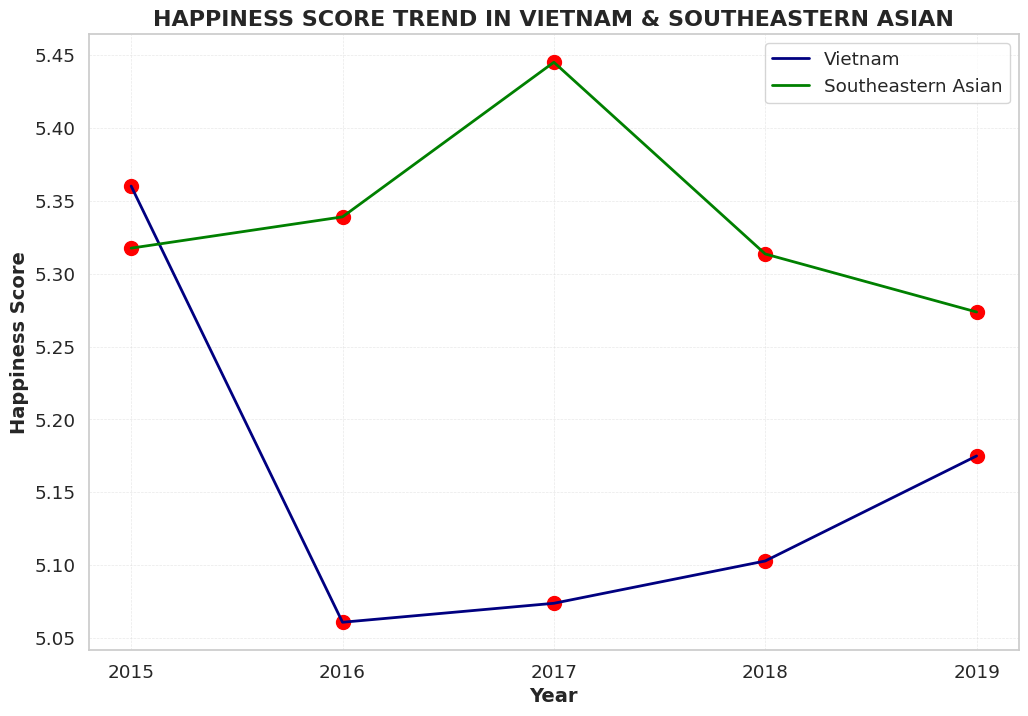

In [7]:
#QUESTION 5 (OPT 1) Compare VN with Southeastern Asian

plt.figure(figsize=(12, 8))

#Happiness score in Vietnam
country = 'Vietnam'  # Specify the country want to analyze
country_data = happiness_data[happiness_data['Country'] == country]

plt.plot(country_data['Year'], country_data['Happiness Score'], color='navy', linewidth=2, label=country)
plt.scatter(country_data['Year'], country_data['Happiness Score'], color='red', s=100)

# Calculate the average happiness score in the Asian region
asian_data = happiness_data[happiness_data['Region'] == 'Southeastern Asia']
asian_avg_score = asian_data.groupby('Year')['Happiness Score'].mean()

plt.plot(asian_avg_score.index, asian_avg_score, color='green', linewidth=2, label='Southeastern Asian')
plt.scatter(asian_avg_score.index, asian_avg_score, color='red', s=100)

#Customize Chart
plt.title(f'HAPPINESS SCORE TREND IN {country.upper()} & SOUTHEASTERN ASIAN', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=14, fontweight='bold')

plt.xticks(country_data['Year'])
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

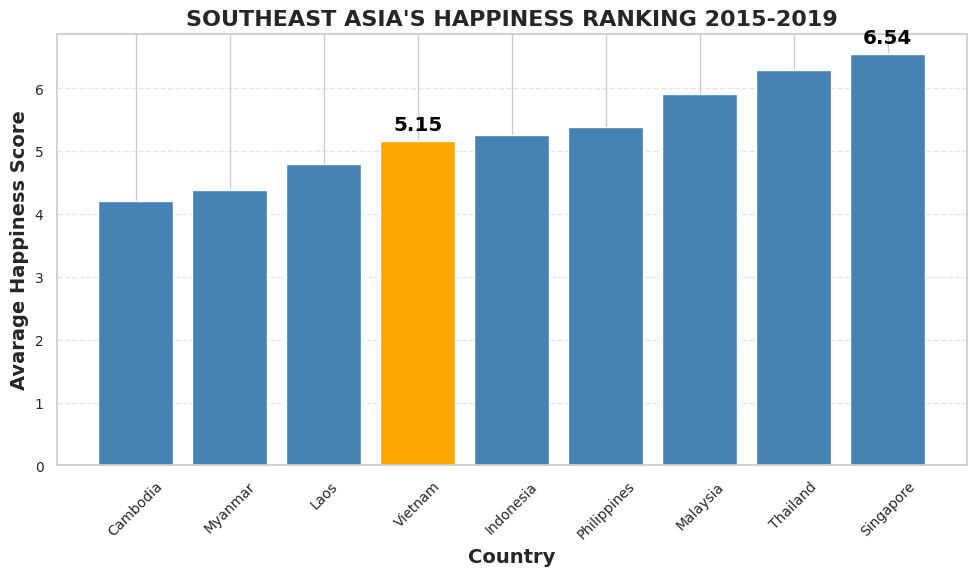

In [8]:
#QUESTION 5 (OPT 2) Compare VN with Southeastern Asian
# Filter data for Southeast Asia region
southeast_asia_data = happiness_data[happiness_data['Region'] == 'Southeastern Asia']

# Sort happiness ranking
ranked_data = southeast_asia_data.groupby(['Country'])['Happiness Score'].mean().reset_index().sort_values('Happiness Score')

# Set the color for the bars
default_color = 'steelblue'

# Create the chart
plt.figure(figsize=(10, 6))

# Plot bars for other countries
plt.bar(ranked_data['Country'], ranked_data['Happiness Score'], color=default_color)

# Highlight Vietnam
highlight_index = ranked_data[ranked_data['Country'] == 'Vietnam'].index[0]
plt.bar(ranked_data.loc[highlight_index, 'Country'], ranked_data.loc[highlight_index, 'Happiness Score'], color='orange')

# Customize the appearance
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Country', fontsize=14,fontweight='bold')
plt.ylabel('Avarage Happiness Score', fontsize=14,fontweight='bold')
plt.title("SOUTHEAST ASIA'S HAPPINESS RANKING 2015-2019", fontsize=16,fontweight='bold')
plt.yticks(fontsize=10)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Add annotation for Vietnam
highlighted_country = ranked_data.loc[highlight_index, 'Country']
highlighted_score = ranked_data.loc[highlight_index, 'Happiness Score']
plt.annotate(f'{highlighted_score:.2f}', xy=(highlighted_country, highlighted_score), xytext=(0, 5),
             textcoords='offset points', ha='center', va='bottom', color='black', weight='bold')

# Add annotation for Singapore
highlight_index_sg = ranked_data[ranked_data['Country'] == 'Singapore'].index[0]
highlighted_country_sg = ranked_data.loc[highlight_index_sg, 'Country']
highlighted_score_sg = ranked_data.loc[highlight_index_sg, 'Happiness Score']
plt.annotate(f'{highlighted_score_sg:.2f}', xy=(highlighted_country_sg, highlighted_score_sg), xytext=(0, 5),
             textcoords='offset points', ha='center', va='bottom', color='black', weight='bold')

# Display the chart
plt.show()


In [ ]:
southeast_asia_data[southeast_asia_data['Country']=='Vietnam']